In [3]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [4]:
load_dotenv()
llm = HuggingFaceEndpoint(
    repo_id="google/gemma-2-2b-it",
    task="text-generation"
)

model = ChatHuggingFace(llm=llm)

In [5]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str

In [8]:
def generate_joke(state: JokeState):

    prompt = f'generate a joke on the topic {state["topic"]}'
    response = model.invoke(prompt).content

    return {'joke': response}

def generate_explanation(state: JokeState):

    prompt = f'write an explanation for the joke - {state["joke"]}'
    response = model.invoke(prompt).content

    return {'explanation': response}

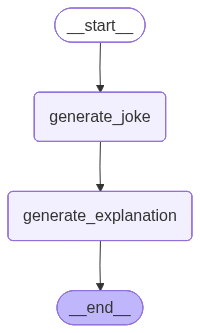

In [9]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

workflow

In [10]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke({'topic':'pizza'}, config=config1)

{'topic': 'pizza',
 'joke': "Why did the pizza slice get in trouble at school? \n\nBecause he was always *crusting* other people's lunch! 🍕😂 \n",
 'explanation': 'This joke plays on the double meaning of the word "crust."\n\n* **Literally:** A pizza crust is the bottom, outer part of the pizza.\n* **Figuratively:** "Crusting" means to be sneaky or to cheat, especially food-wise. \n\nThe joke works like this: \n\n* **The Setup:**  A pizza slice is a school-lunch-eating character, similar to a student.\n* **The Punchline:** It funny twists the kneading of a fun-to-eat food to get out? It refers to the act of confusing someone with an innocuous message while it\'s obscene.\n\nIt\'s a pun, combining the image of a pizza slice with the slang term "crusting" to make a light-hearted joke. 🍕 \n'}

In [11]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the pizza slice get in trouble at school? \n\nBecause he was always *crusting* other people's lunch! 🍕😂 \n", 'explanation': 'This joke plays on the double meaning of the word "crust."\n\n* **Literally:** A pizza crust is the bottom, outer part of the pizza.\n* **Figuratively:** "Crusting" means to be sneaky or to cheat, especially food-wise. \n\nThe joke works like this: \n\n* **The Setup:**  A pizza slice is a school-lunch-eating character, similar to a student.\n* **The Punchline:** It funny twists the kneading of a fun-to-eat food to get out? It refers to the act of confusing someone with an innocuous message while it\'s obscene.\n\nIt\'s a pun, combining the image of a pizza slice with the slang term "crusting" to make a light-hearted joke. 🍕 \n'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c3aa7-574d-6105-8002-681938985649'}}, metadata={'source': 'loop', 'step': 2, 'parents'

In [12]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the pizza slice get in trouble at school? \n\nBecause he was always *crusting* other people's lunch! 🍕😂 \n", 'explanation': 'This joke plays on the double meaning of the word "crust."\n\n* **Literally:** A pizza crust is the bottom, outer part of the pizza.\n* **Figuratively:** "Crusting" means to be sneaky or to cheat, especially food-wise. \n\nThe joke works like this: \n\n* **The Setup:**  A pizza slice is a school-lunch-eating character, similar to a student.\n* **The Punchline:** It funny twists the kneading of a fun-to-eat food to get out? It refers to the act of confusing someone with an innocuous message while it\'s obscene.\n\nIt\'s a pun, combining the image of a pizza slice with the slang term "crusting" to make a light-hearted joke. 🍕 \n'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c3aa7-574d-6105-8002-681938985649'}}, metadata={'source': 'loop', 'step': 2, 'parents

In [13]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': 'Why did the pasta blush?\n\nBecause it saw the salad dressing! 😂🍅🍝  \n',
 'explanation': 'This joke plays on the suggestive use of wordplay. \n\nHere\'s the breakdown:\n\n* **The Setup:** "Pasta" is the object of the joke.  The pasta is not literally blushing.\n* **The Punchline:** "Salad dressing" is often a playful but potentially humorous term for someone\'s attractiveness, especially in a romantic context.\n* **The Humor:** The joke relies on our expectation, specifically for "pasta" meaning the food, to be connected to the romantic event. This confusion creates the humor by being unexpected and relying on cheeky associations. \n\nEssentially, it\'s a playful, silly scenario that makes people chuckle by jumping between the literal and metaphorical. \n'}

In [14]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the pizza slice get in trouble at school? \n\nBecause he was always *crusting* other people's lunch! 🍕😂 \n", 'explanation': 'This joke plays on the double meaning of the word "crust."\n\n* **Literally:** A pizza crust is the bottom, outer part of the pizza.\n* **Figuratively:** "Crusting" means to be sneaky or to cheat, especially food-wise. \n\nThe joke works like this: \n\n* **The Setup:**  A pizza slice is a school-lunch-eating character, similar to a student.\n* **The Punchline:** It funny twists the kneading of a fun-to-eat food to get out? It refers to the act of confusing someone with an innocuous message while it\'s obscene.\n\nIt\'s a pun, combining the image of a pizza slice with the slang term "crusting" to make a light-hearted joke. 🍕 \n'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c3aa7-574d-6105-8002-681938985649'}}, metadata={'source': 'loop', 'step': 2, 'parents'

In [15]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the pizza slice get in trouble at school? \n\nBecause he was always *crusting* other people's lunch! 🍕😂 \n", 'explanation': 'This joke plays on the double meaning of the word "crust."\n\n* **Literally:** A pizza crust is the bottom, outer part of the pizza.\n* **Figuratively:** "Crusting" means to be sneaky or to cheat, especially food-wise. \n\nThe joke works like this: \n\n* **The Setup:**  A pizza slice is a school-lunch-eating character, similar to a student.\n* **The Punchline:** It funny twists the kneading of a fun-to-eat food to get out? It refers to the act of confusing someone with an innocuous message while it\'s obscene.\n\nIt\'s a pun, combining the image of a pizza slice with the slang term "crusting" to make a light-hearted joke. 🍕 \n'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c3aa7-574d-6105-8002-681938985649'}}, metadata={'source': 'loop', 'step': 2, 'parents

# Time Travel


In [16]:
workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0c3aa7-398f-65d4-8000-b8349e7f71d2"}})

StateSnapshot(values={'topic': 'pizza'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0c3aa7-398f-65d4-8000-b8349e7f71d2'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-11-17T11:42:09.974626+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c3aa7-398c-6eca-bfff-88c515944564'}}, tasks=(PregelTask(id='e080cd0f-594f-96a9-a744-a35ab30a4c6a', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': "Why did the pizza slice get in trouble at school? \n\nBecause he was always *crusting* other people's lunch! 🍕😂 \n"}),), interrupts=())

In [17]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f0c3aa7-398f-65d4-8000-b8349e7f71d2"}})

{'topic': 'pizza',
 'joke': "Why did the pizza slice run away from the oven? \n\nBecause it was garlic-ed and burned! 😂 🍕 💨 \n\n\nLet me know if you'd like to hear another pizza joke! 🍕🎉 \n",
 'explanation': 'This joke plays on two things: \n\n1. **Alliteration:** The phrase "garlic-ed" for the pizza slice is a silly way to say someone is "glaring" for being too bold or wanting to share everything. It also utilizes the two sounds of "garlic".\n\n2. **Pun:** The joke uses the word "garlic-ed" and the idea of being "burnt" to create a pun by associating a cooked food with a feeling of being overwhelmed. Garlic is found in cuisines that contain strong, savory tastes. It is combined with "burning" for humor.\n\n\nIt\'s a silly joke that plays on the humorous combination of wordplay and pizza imagery! 🍕  \n'}

In [18]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the pizza slice run away from the oven? \n\nBecause it was garlic-ed and burned! 😂 🍕 💨 \n\n\nLet me know if you'd like to hear another pizza joke! 🍕🎉 \n", 'explanation': 'This joke plays on two things: \n\n1. **Alliteration:** The phrase "garlic-ed" for the pizza slice is a silly way to say someone is "glaring" for being too bold or wanting to share everything. It also utilizes the two sounds of "garlic".\n\n2. **Pun:** The joke uses the word "garlic-ed" and the idea of being "burnt" to create a pun by associating a cooked food with a feeling of being overwhelmed. Garlic is found in cuisines that contain strong, savory tastes. It is combined with "burning" for humor.\n\n\nIt\'s a silly joke that plays on the humorous combination of wordplay and pizza imagery! 🍕  \n'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c3b6d-ed3e-6d93-8002-637446ff9e66'}}, metadata={'source': 'loop', 'st

In [19]:
workflow.update_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0c3aa7-398f-65d4-8000-b8349e7f71d2", "checkpoint_ns": ""}}, {'topic':'samosa'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0c3b70-bf34-61c3-8001-03eace10a4fe'}}

In [24]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': "Why did the pizza slice get in trouble at school? \n\nBecause he was always *crusting* other people's lunch! 🍕😂 \n", 'explanation': 'This joke is a pun! Here\'s how it works:\n\n* **Crust: ** In pizzas, the crust is the bottom, outer layer. \n* **Crusting:** This word means to hang out or be together with someone in a friendly, or sometimes even mischievous, way.\n\nThe humor comes from the word play on "crusting" being similar to "crusty" which implies someone or something rough or unrefined. It\'s like saying the pizza slice was being a little bit rough with the other students\' lunch. 😄 \n\n\nLet me know if you\'d like to try another pun explanation! 😊 \n'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c3b75-2965-697b-8002-43905647134e'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-11-17T13:14:18.050188+00:00', parent_config={'configurable': {'thread_id': 

In [26]:

workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f0c3b75-2965-697b-8002-43905647134e"}})

{'topic': 'samosa',
 'joke': "Why did the pizza slice get in trouble at school? \n\nBecause he was always *crusting* other people's lunch! 🍕😂 \n",
 'explanation': 'This joke is a pun! Here\'s how it works:\n\n* **Crust: ** In pizzas, the crust is the bottom, outer layer. \n* **Crusting:** This word means to hang out or be together with someone in a friendly, or sometimes even mischievous, way.\n\nThe humor comes from the word play on "crusting" being similar to "crusty" which implies someone or something rough or unrefined. It\'s like saying the pizza slice was being a little bit rough with the other students\' lunch. 😄 \n\n\nLet me know if you\'d like to try another pun explanation! 😊 \n'}

In [27]:

list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': "Why did the pizza slice get in trouble at school? \n\nBecause he was always *crusting* other people's lunch! 🍕😂 \n", 'explanation': 'This joke is a pun! Here\'s how it works:\n\n* **Crust: ** In pizzas, the crust is the bottom, outer layer. \n* **Crusting:** This word means to hang out or be together with someone in a friendly, or sometimes even mischievous, way.\n\nThe humor comes from the word play on "crusting" being similar to "crusty" which implies someone or something rough or unrefined. It\'s like saying the pizza slice was being a little bit rough with the other students\' lunch. 😄 \n\n\nLet me know if you\'d like to try another pun explanation! 😊 \n'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c3b75-2965-697b-8002-43905647134e'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-11-17T13:14:18.050188+00:00', parent_config={'configurable': {'thread_id': 